<a href="https://colab.research.google.com/github/atishayj4in/DogAndCatClassifier/blob/main/DogAndCatClassifier_by_AtishayJain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.05G/1.06G [00:11<00:00, 90.7MB/s]
100% 1.06G/1.06G [00:11<00:00, 101MB/s] 


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.applications.vgg16 import VGG16

In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [ ]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
# # Normalize
# def process(image,label):
#     image = tensorflow.cast(image/150. ,tensorflow.float32)
#     return image,label

# train_ds = train_ds.map(process)
# validation_ds = validation_ds.map(process)]
early_stopping = keras.callbacks.EarlyStopping(
    patience=4,
    min_delta=0.001,
    restore_best_weights=True
)

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
  )

In [ ]:
history = model.fit(train_generator,epochs=10,validation_data=validation_generator,callbacks=early_stopping)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.9059 - loss: 0.2141

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 161s 252ms/step - accuracy: 0.9059 - loss: 0.2141 - val_accuracy: 0.9218 - val_loss: 0.1921
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 244ms/step - accuracy: 0.9337 - loss: 0.1641 - val_accuracy: 0.9432 - val_loss: 0.1371
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 204s 247ms/step - accuracy: 0.9449 - loss: 0.1377 - val_accuracy: 0.9426 - val_loss: 0.1480
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 244ms/step - accuracy: 0.9565 - loss: 0.1121 - val_accuracy: 0.9530 - val_loss: 0.1178
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 242ms/step - accuracy: 0.9593 - loss: 0.1054 - val_accuracy: 0.9518 - val_loss: 0.1195
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 155s 246ms/step - accuracy: 0.9658 - loss: 0.0882 - val_accuracy: 0.9550 - val_loss: 0.1134
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 155s 245ms/step - accuracy: 0.9667 - loss: 0.0845 - val_accuracy: 0.9550 - val_loss: 0.1181
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 155s 245ms/step - accuracy: 0.9708 - loss: 0.07

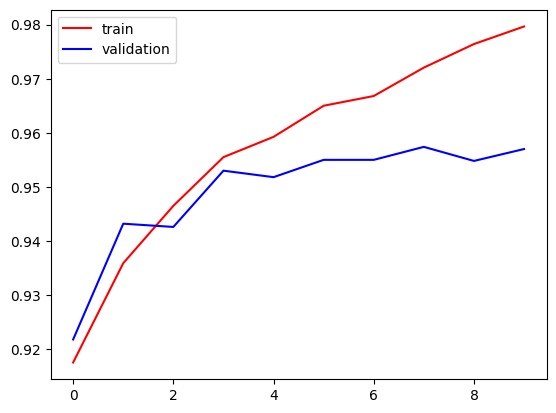

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

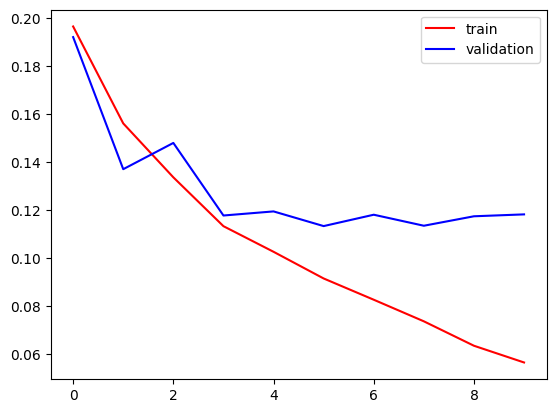

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

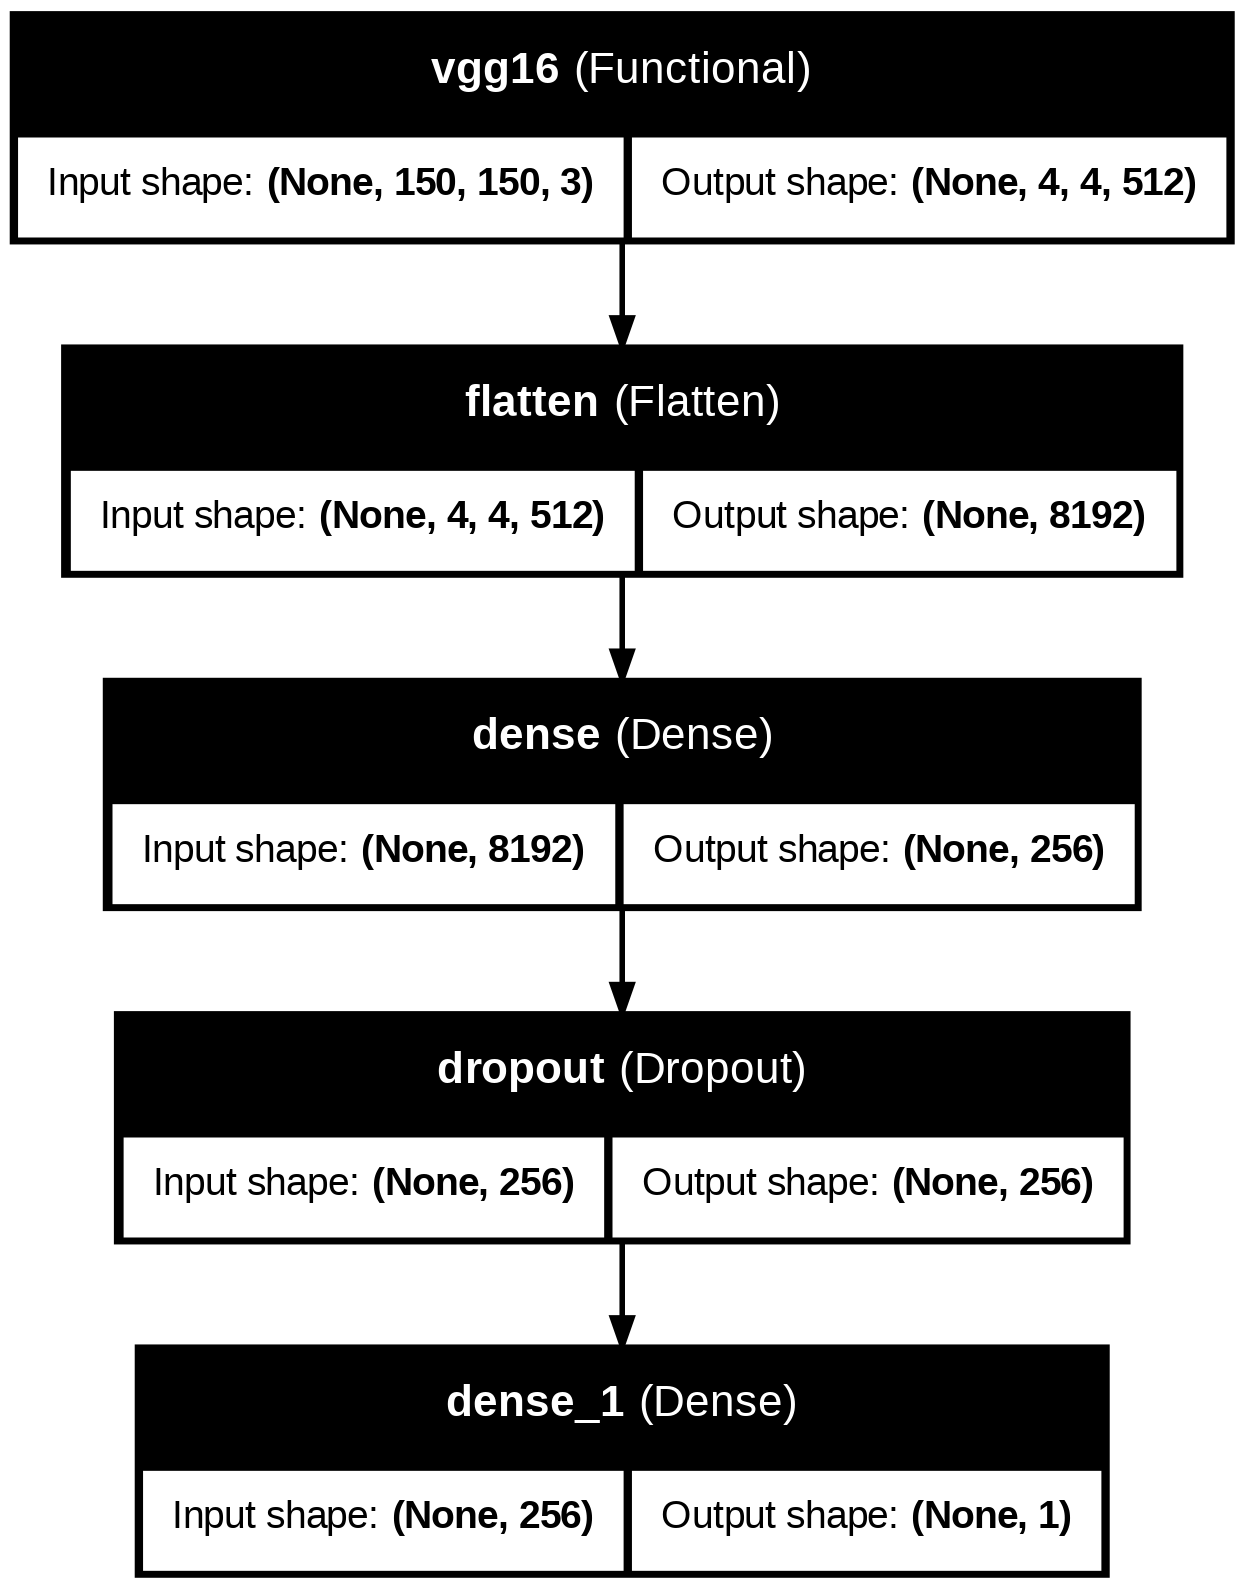

In [ ]:
# prompt: generate model architecture using plot_model

from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

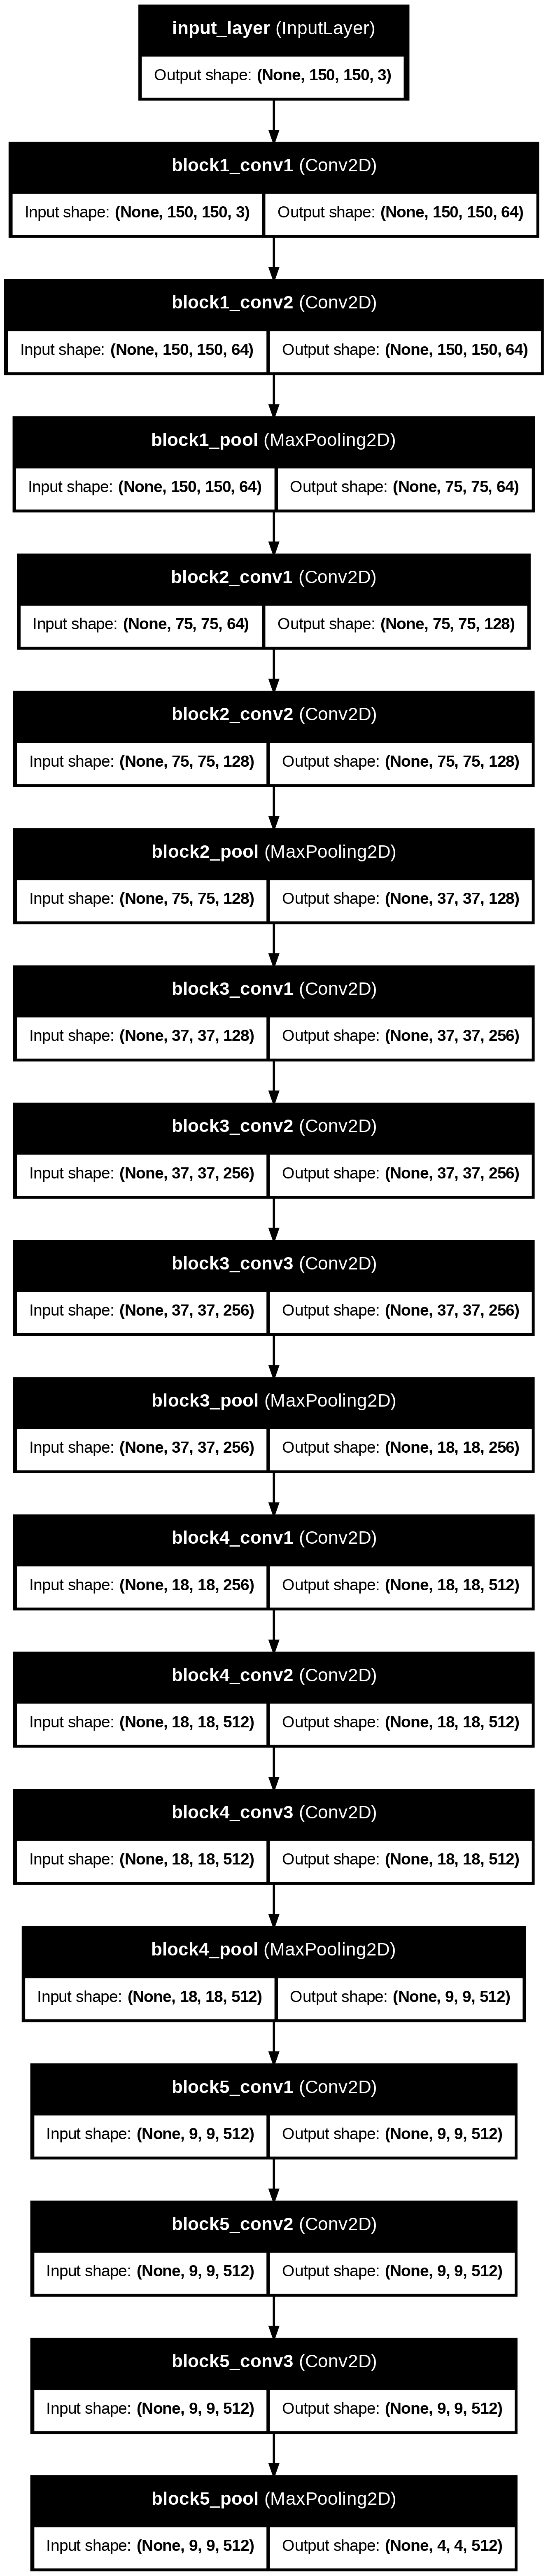

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(conv_base, to_file='vgg16_architecture.png', show_shapes=True, show_layer_names=True)

In [ ]:
import numpy as np
from PIL import Image

def predict_image(image_path):
    # Load and preprocess the image
    img = Image.open(image_path).resize((150, 150))
    # Convert image to RGB format to ensure it has 3 channels
    img = img.convert('RGB')  # This line is added
    img_array = np.array(img) / 150.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    prediction = model.predict(img_array)

    # Interpret the prediction
    if prediction[0][0] < 0.5:
        return "cat"
    else:
        return "dog"

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image

def predict_image(image_path):
    # Load and preprocess the image
    img = Image.open(image_path).resize((150, 150))
    img = img.convert('RGB')
    img_array = np.array(img) / 150.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    prediction = model.predict(img_array)

    # Interpret the prediction
    if prediction[0][0] < 0.5:
        predicted_class = "cat"
    else:
        predicted_class = "dog"

    # Display the image and prediction
    img = mpimg.imread(image_path) # Load image for display
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class}")
    plt.axis('off') # Hide axes
    plt.show()

    return predicted_class

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


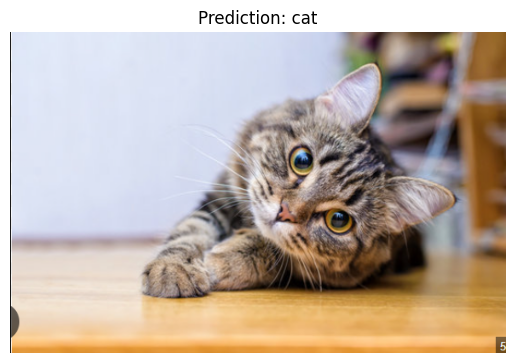

'cat'

In [ ]:
predict_image('/content/Screenshot 2024-12-24 235100.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


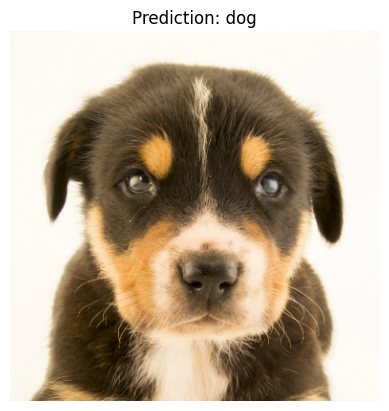

'dog'

In [ ]:
predict_image('/content/Screenshot 2024-12-23 185423.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


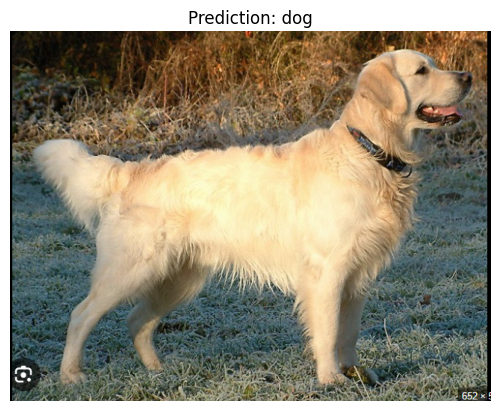

'dog'

In [ ]:
predict_image('/content/Screenshot 2024-12-23 185609.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


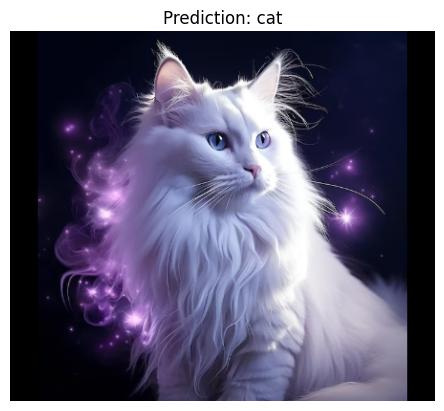

'cat'

In [ ]:
predict_image('/content/Screenshot 2024-12-23 205645.png')

In [ ]:
# prompt: save my generated model

model.save('my_model.h5')
!cp my_model.h5 /content/drive/MyDrive/

cp: cannot create regular file '/content/drive/MyDrive/': No such file or directory


Best validation accuracy: 95.74%
Best trained accuracy: 97.97%


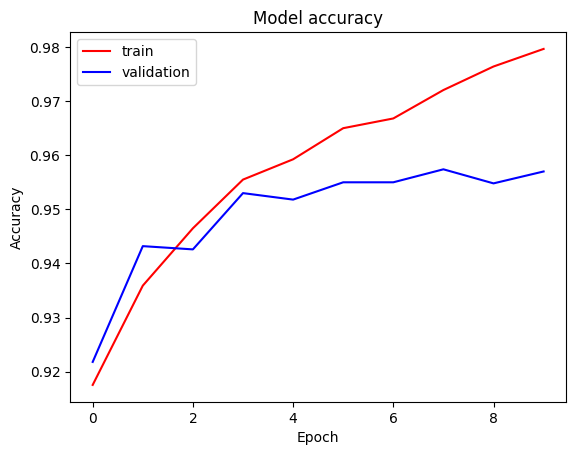

In [ ]:
# prompt: give me accuracy percentage on unseen data

import matplotlib.pyplot as plt

# Assuming 'history' is the result of model.fit
# and contains 'val_accuracy' in its history

# Access the validation accuracy values
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

# Get the best validation accuracy
best_val_accuracy = max(val_accuracy)
vc=max(accuracy)

# Print the result
print(f"Best validation accuracy: {best_val_accuracy:.2%}")
print(f"Best trained accuracy: {vc:.2%}")


# Plot the accuracy
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
tf.keras.callbacks.ModelCheckpoint

keras.src.callbacks.model_checkpoint.ModelCheckpoint

In [ ]:
# checkpoint_path = "training_1/cp.weights.h5" # Since you're only saving weights, you should use the .weights.h5 extension. If you're saving the whole model, you would use the .keras extension instead
# checkpoint_dir = os.path.dirname(checkpoint_path)

# # Create a callback that saves the model's weights
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                  save_weights_only=True,
#                                                  verbose=1)

# # Train the model with the new callback
# model.fit(train_images,
#           train_labels,
#           epochs=10,
#           validation_data=(test_images, test_labels),
#           callbacks=[cp_callback])  # Pass callback to training

In [ ]:
model.save('my_model.h5')  # Saves the model to 'my_model.h5' file